## Exploring the endangered languages of the world

#### This project consists of two datasets from kaggle (https://www.kaggle.com/rtatman/world-language-family-map) with information about social and geographical features of thousands of languages. My main interest is to analyze and visualize data about languages that are classified as endangered. 

### Setup and definitions

In [1]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('languoid.csv')
df.head(10)

,bookkeeping,child_dialect_count,child_family_count,child_language_count,description,family_pk,father_pk,hid,id,jsondata,latitude,level,longitude,markup_description,name,newick,pk,status
0,False,0,0,0,NaN,21.0,20815.0,NaN,aala1237,{},NaN,dialect,NaN,NaN,Aalawa,'Aalawa [aala1237]',21802,safe
1,False,0,0,0,NaN,50.0,5525.0,NaN,aant1238,{},NaN,dialect,NaN,NaN,Aantantara,'Aantantara [aant1238]',8074,safe
2,False,0,0,2,NaN,202.0,1349.0,aiz,aari1238,{},NaN,family,NaN,NaN,Aari-Gayil,"('Aari [aari1239][aiw]-l-','Gayil [gayi1237][g...",2656,safe
3,False,0,0,0,NaN,202.0,2656.0,aiw,aari1239,{},5.95034,language,36.5721,NaN,Aari,'Aari [aari1239][aiw]-l-',4424,safe
4,True,0,0,0,NaN,120.0,120.0,aay,aari1240,{},NaN,language,NaN,NaN,Aariya,'Aariya [aari1240][aay]-l-',1134,safe
5,False,0,0,0,NaN,376.0,4943.0,aas,aasa1238,{},-4.00679,language,36.8648,NaN,Aasax,'Aasax [aasa1238][aas]-l-',7144,extinct
6,False,0,0,0,NaN,50.0,5523.0,NaN,aata1238,{},NaN,dialect,NaN,NaN,Aatasaara,'Aatasaara [aata1238]',8070,safe
7,False,0,0,0,NaN,151.0,9058.0,NaN,abaa1238,{},NaN,dialect,NaN,NaN,Aba,'Aba [abaa1238]',11889,safe
8,False,0,0,0,NaN,376.0,3203.0,NaN,abab1239,{},NaN,dialect,NaN,NaN,Ababda,'Ababda [abab1239]',4942,safe
9,False,29,12,21,NaN,10.0,7598.0,NaN,abab1240,{},NaN,family,NaN,NaN,Ababuan,"(('Bafwandaka [bafw1242]','Bakundumu [baku1261...",10186,safe


In [3]:
#Print the number of rows and columns of the dataset
df.shape

(23243, 18)

In [7]:
# List the names of the columns, to see which ones are relevant for our analysis
list(df.columns)

['bookkeeping',
 'child_dialect_count',
 'child_family_count',
 'child_language_count',
 'description',
 'family_pk',
 'father_pk',
 'hid',
 'id',
 'jsondata',
 'latitude',
 'level',
 'longitude',
 'markup_description',
 'name',
 'newick',
 'pk',
 'status']

### Analysis of languages by level and status

In [10]:
lns_df = df[['level', 'name', 'status']]
lns_df.tail(10)

,level,name,status
23233,dialect,Zumu,safe
23234,language,Zuni,vulnerable
23235,language,Zuojiang Zhuang,safe
23236,dialect,Zura,safe
23237,dialect,Zurrieq,safe
23238,dialect,Zutiua,safe
23239,dialect,Zuwadza,safe
23240,dialect,Zwall,safe
23241,language,Zyphe,safe
23242,dialect,Zyuzdin,safe


In [15]:
lns_df['level'].unique()

array(['dialect', 'family', 'language'], dtype=object)

In [21]:
lns_df['status'].unique()

array(['safe', 'extinct', 'critically endangered',
       'definitely endangered', 'vulnerable', 'severely endangered'],
      dtype=object)

In [22]:
#Find the total number of language families, languages, and dialects
lang_sum = pd.value_counts(df['level'].values, sort=False)
lang_sum

language     8444
family       4268
dialect     10531
dtype: int64

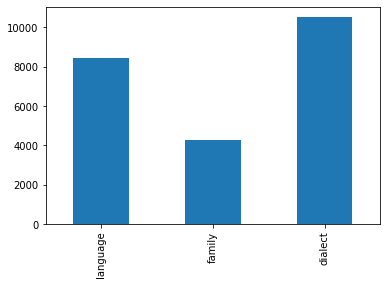

In [24]:
# Plot the language types
import matplotlib.pyplot as plt
%matplotlib inline  
lang_sum.plot(kind='bar')

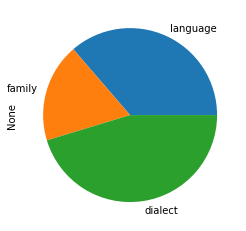

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline  
lang_sum.plot(kind='pie')

In [26]:
#Find the total number of languages in each status
status_sum = pd.value_counts(lns_df['status'], sort=True)
status_sum

safe                     20112
extinct                   1104
definitely endangered      585
vulnerable                 582
severely endangered        434
critically endangered      426
Name: status, dtype: int64

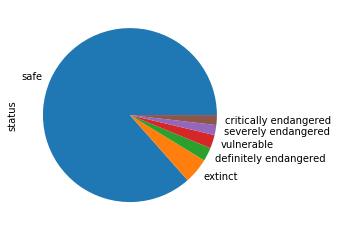

In [32]:
status_sum.plot(kind='pie')

In [67]:
#Print the summary of language level by status
level_status = pd.crosstab(df.level, df.status)
level_status

status,critically endangered,definitely endangered,extinct,safe,severely endangered,vulnerable
level,,,,,,
dialect,3,4,42,10479,1,2
family,0,0,3,4265,0,0
language,423,581,1059,5368,433,580


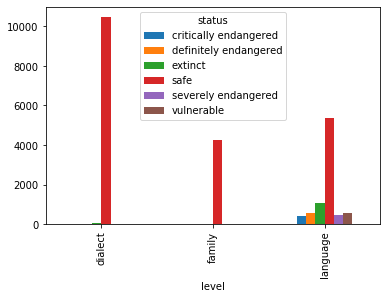

In [68]:
#Plot summary of languages by level and status
import matplotlib.pyplot as plt
level_status.plot(kind='bar')

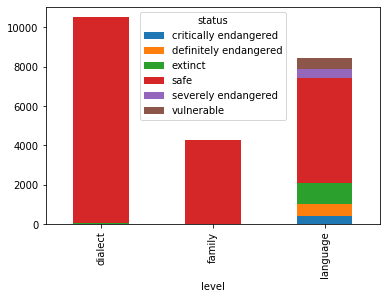

In [50]:
summary.plot(kind='bar', stacked=True)

### Extinct language families

In [77]:
ext_fam = df[(df.level == 'family') & (df.status == 'extinct')]
ext_fam_names = ext_fam[['name']]
ext_fam_names

,name
3694,Chimakuan
4577,Djiwarli-Thiin
5972,Garrwan


### Endangered dialects

In [88]:
vul_dialects = df[(df.level == 'dialect') & (df.status == 'vulnerable')]
vul_dialects_names = vul_dialects[['name']]
vul_dialects_names

,name
9687,Krahô
9697,Krikati-Timbira


In [89]:
sev_dialects = df[(df.level == 'dialect') & (df.status == 'severely endangered')]
sev_dialects_names = sev_dialects[['name']]
sev_dialects_names

,name
2550,Bom


In [90]:
crit_dialects = df[(df.level == 'dialect') & (df.status == 'critically endangered')]
crit_dialects_names = crit_dialects[['name']]
crit_dialects_names

,name
6453,Kinikinao
9698,Krim
22502,Xiandao


In [91]:
def_dialects = df[(df.level == 'dialect') & (df.status == 'definitely endangered')]
def_dialects_names = def_dialects[['name']]
def_dialects_names

,name
4924,Eastern Gurung
12235,Mea
17011,Repanbitip
21958,Western Gurung


### Geographical analysis

In [66]:
geo_df = pd.read_csv('languages-and-dialects-geo.csv')
geo_nlm = geo_df[['name', 'level', 'macroarea']]
geo_nlm.head()

,name,level,macroarea
0,Aalawa,dialect,Papunesia
1,Aantantara,dialect,Papunesia
2,Aari,language,Africa
3,Aariya,language,Eurasia
4,Aasax,language,Africa


In [59]:
geo_sum = pd.crosstab(geo.level, geo.macroarea)
geo_sum

macroarea,Africa,Australia,Eurasia,North America,Papunesia,South America
level,,,,,,
dialect,3616,174,3065,261,2645,392
language,2328,376,1949,784,2196,704


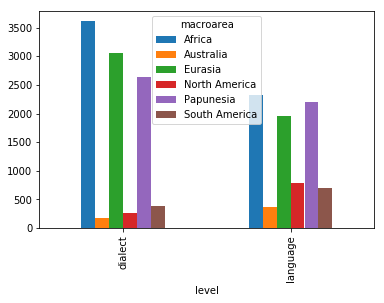

In [63]:
geo_sum.plot(kind='bar')

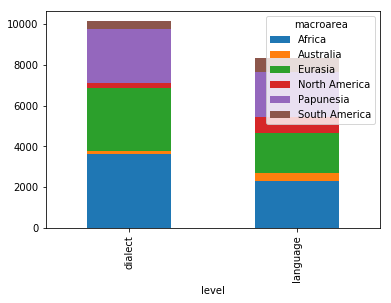

In [64]:
geo_sum.plot(kind='bar', stacked=True)